# Content_Based Recommender Systems


This technique can recommend the items based on past visits,purchases, etc of the user and similarities between items. 

We don't need the information of other users. 

It is not related to other users' interests.

The disadvantage of using this technique is that, the recommendations can be just based on the user's interests, and it is not going beyond that.

SO, THE MORE KNOWLEDGE ABOUT THE USER'S ENGINEERIG, THE BETTER. 




In this part, we show how to recommend the items that are  very similar to the other items. 
For example, if the rate of an item is very good and defined by users, we will find high ranking itesm that have high correlation with that item and recommend them. 

# Data Reading

MovieLens 100K Dataset
https://grouplens.org/datasets/movielens/100k/
    
MovieLens 100K movie ratings. Stable benchmark dataset. 100,000 ratings from 1000 users on 1700 movies.    

MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. 
    * Simple demographic info for the users (age, gender, occupation, zip)
        
u.data     -- The full u data set, 100000 ratings by 943 users on 1682 items.
              Each user has rated at least 20 movies.  Users and items are
              numbered consecutively from 1.  The data is randomly
              ordered. This is a tab separated list of 
	         user id | item id | rating | timestamp. 
              The time stamps are unix seconds since 1/1/1970 UTC   


# Step 1: 
We first read the data sets and find some information about it. 

1- Rating data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
name_columns = ['user id','movie id','rating','timestamp']
movie_rating = pd.read_csv('u.data' , sep='\t', names=name_columns)

In [3]:
movie_rating.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
movie_rating.info

<bound method DataFrame.info of        user id  movie id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
...        ...       ...     ...        ...
99995      880       476       3  880175444
99996      716       204       5  879795543
99997      276      1090       1  874795795
99998       13       225       2  882399156
99999       12       203       3  879959583

[100000 rows x 4 columns]>

In [5]:
print(f"""data has {movie_rating.shape[0]} rating with {movie_rating['user id'].nunique()} movie and {movie_rating['movie id'].nunique()} items""")

data has 100000 rating with 943 movie and 1682 items


2- Movie titles


For finding titles of movies I first create a dataframe using u.item and then drop any column that I don't need

u.item     -- Information about the items (movies); this is a tab separated
              list of
              movie id | movie title | release date | video release date |
              IMDb URL | unknown | Action | Adventure | Animation |
              Children's | Comedy | Crime | Documentary | Drama | Fantasy |
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
              Thriller | War | Western |
              The last 19 fields are the genres, a 1 indicates the movie
              is of that genre, a 0 indicates it is not; movies can be in
              several genres at once.
              The movie ids are the ones used in the u.data data set.
              
              
From this data set I need movie id and titles.               

In [6]:
title_columns = ['movie id','movie title','release date','video release date','IMDb URL','unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
movie_title = pd.read_csv('u.item',sep='|', names= title_columns , engine='python')

In [7]:
movie_title.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Now create a new dataframe using the previous one

In [8]:
title_movies =pd.DataFrame(movie_title[['movie id','movie title']])

In [9]:
title_movies.head()

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [10]:
title_movies.info

<bound method DataFrame.info of       movie id                                movie title
0            1                           Toy Story (1995)
1            2                           GoldenEye (1995)
2            3                          Four Rooms (1995)
3            4                          Get Shorty (1995)
4            5                             Copycat (1995)
...        ...                                        ...
1677      1678                          Mat' i syn (1997)
1678      1679                           B. Monkey (1998)
1679      1680                       Sliding Doors (1998)
1680      1681                        You So Crazy (1994)
1681      1682  Scream of Stone (Schrei aus Stein) (1991)

[1682 rows x 2 columns]>

# Step 2:

Now we merge two tables: movie_rating and title_movies

In [11]:
movie_rating = pd.merge(movie_rating,title_movies, on="movie id" )

In [12]:
movie_rating.head()

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


# Data Visualization and Analysis

In this part, we show that for each film how many ratngs have been given . So , we first groupby the data by title of the film and count number of rating 


We sort them in a descending order.


In [13]:
movie_rating.groupby('movie title')['rating'].count().sort_values(ascending= False)


movie title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
� k�ldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64


In this part, we show for each film what is the average of rating given by users.

We sort them in a descending orders


In [14]:
movie_rating.groupby('movie title')['rating'].mean().sort_values(ascending=False)

movie title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de d�cembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

We create a new dataframe by categorizing the film titles, based on their rating. 


In [15]:
just_rates = pd.DataFrame(movie_rating.groupby('movie title')['rating'].mean())

This tables shows that for each movies what is the average of rating given by the users to that, the more the better. 

In [16]:
just_rates.head()

,rating
movie title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [17]:
just_rates['rating average'] = just_rates['rating']
just_rates.head()
just_rates = just_rates.drop(['rating'],axis=1)

When we want to recommend a movie, in addition to the ratnigs that are given to the mvoeis, we should also consider that how many peoplehave given rating or have chosen that film to wathch? The more, the better. So, we add number of rating for each movie in addition to th rates.

In [18]:
just_rates['rating quantities'] = pd.DataFrame(movie_rating.groupby('movie title')['rating'].count())

In [19]:
just_rates.head()

,rating average,rating quantities
movie title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


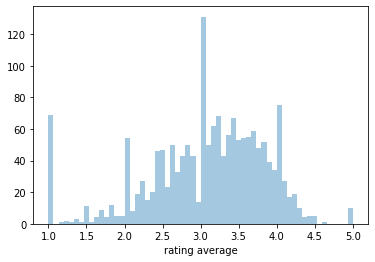

In [22]:
sns.distplot(just_rates['rating average'],bins=60,kde=False)

The above plot shows distribution of ratings, which is between 1-5 but most of the films have rating = 3.

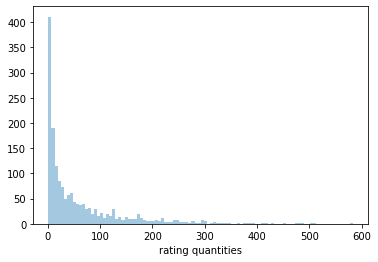

In [25]:
sns.distplot(just_rates['rating quantities'],bins=100,kde=False)

The above plot is showing that most of the films have been chosen less than 10 times and are close to zero times. There are few films that have been chosen 500 times.
ALSO, WE ALREADY NEW THAT USERS RATED AT LEAST TO 20 ITEMS. 

We also check the relation ship between nmber of ratings and the rates given to the films to see if there is any relationship between them or not? normally, the more number of ratings a film has it means the better film it was so, the ranking given to that film should be higher. 

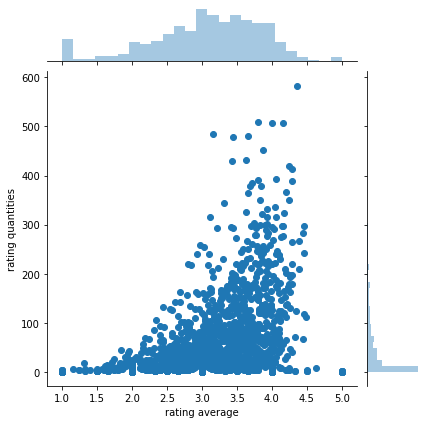

In [29]:
sns.jointplot(x = 'rating average' , y = 'rating quantities', data = just_rates)

We can see some how this relationship between two elements. 

This technique recommend movies simiilar to the top rating movies with hight number of rating and high rates (5).
We recommend films similar to the starwars.

SO, IF SOMEONE WACHED STARWARS, WE CAN RECOMMEND TOP BEST FILMS SIMILAR TO STARWARS TO HIM/HER. etc.

# RECOOMENDATION BASED ON SIMILARITIES BETWEEN MOVIES

If a user watched an item, we can find that item and recommend similar movies to that item to the user, based on ranking and number of ratings. 
First we create a matrix rows are users, clumns are title of movies and values are ranking given to the items by the users.

In [34]:
rating_matrix = movie_rating.pivot_table(index='user id',columns ='movie title',values ='rating')

In [35]:
rating_matrix.head()

movie title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


Ther are a lot of missing values that should be filled. 
SO, based on the below tables, the most rated movies are available: Star wars, Contact, Fargo,Return of the Jedi, Liar Liar... THESE ARE MOVIES WITH THE MOST NUMBER OF RATINGS

In [38]:
just_rates.sort_values('rating quantities', ascending=False)

,rating average,rating quantities
movie title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


We choose startwrs and contact movies. 
For startwars, we want to find out the films similar to that mvois based on the ratings and number of ratings. 

In [40]:
startwars_rating = rating_matrix['Star Wars (1977)']

In [41]:
startwars_rating.head()

user id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [43]:
corr_sartwars= rating_matrix.corrwith(startwars_rating)

/Users/mahsa/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/mahsa/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


The above sohws correlation between startwars and other films based on their rating 1-5. so it will findhigh rating films. 

In [44]:
corr_sartwars.head()

movie title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [45]:
corr_star = pd.DataFrame(corr_sartwars,columns=['cor'])

In [51]:
corr_star.dropna(inplace=True)
corr_star.sort_values('cor',ascending=False)

,cor
movie title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [53]:
corr_star=corr_star.join(just_rates['rating quantities'])

Belo we want to find ouut movies with high correlatio with startwars(ratingclose to 5) and choose those movies that has been raed more than 100 times.

In [57]:
corr_star[corr_star['rating quantities']>100].sort_values('cor',ascending=False).head()

,cor,rating quantities
movie title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


Now we can recommend films siilr to the star wars, like Empire Strikes. Return of Jedi. Raiders of the Ark. 
So, we recommend similar movies to the star wars. In chosing movie, number of ratings and the rating value has been consdered. 

# One more

Imagine someone has watched 'Return of the Jedi (1983)'. We want to recommedn himsimilar movie as  'Return of the Jedi (1983)'. 
First we consider a table with one columns wich is this movie rating.s 


In [64]:
returnjedi_rating = rating_matrix['Return of the Jedi (1983)']

In [65]:
returnjedi_rating.head(100)

user id
1      5.0
2      NaN
3      4.0
4      NaN
5      5.0
      ... 
96     5.0
97     NaN
98     NaN
99     5.0
100    NaN
Name: Return of the Jedi (1983), Length: 100, dtype: float64

In [66]:
corr_jedi = rating_matrix.corrwith(returnjedi_rating)

/Users/mahsa/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/mahsa/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [67]:
corr_jedi

movie title
'Til There Was You (1997)                1.000000
1-900 (1994)                            -0.828079
101 Dalmatians (1996)                    0.165659
12 Angry Men (1957)                     -0.026169
187 (1997)                               0.064155
                                           ...   
Young Guns II (1990)                     0.347842
Young Poisoner's Handbook, The (1995)    0.036205
Zeus and Roxanne (1997)                  0.866025
unknown                                  0.842440
� k�ldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [68]:
correlation_jedi = pd.DataFrame(corr_jedi, columns=['correlations'])

In [71]:
correlation_jedi.head()

,correlations
movie title,
'Til There Was You (1997),1.000000
1-900 (1994),-0.828079
101 Dalmatians (1996),0.165659
12 Angry Men (1957),-0.026169
187 (1997),0.064155


In [72]:
correlation_jedi  = correlation_jedi.join(just_rates['rating quantities'])

In [73]:
correlation_jedi.head()

,correlations,rating quantities
movie title,,
'Til There Was You (1997),1.000000,9
1-900 (1994),-0.828079,5
101 Dalmatians (1996),0.165659,109
12 Angry Men (1957),-0.026169,125
187 (1997),0.064155,41


Find values highly similar to Jedi movie: 

In [76]:
correlation_jedi[correlation_jedi['rating quantities']>100].sort_values('correlations',ascending=False).head(5)

,correlations,rating quantities
movie title,,
Return of the Jedi (1983),1.000000,507
"Empire Strikes Back, The (1980)",0.721229,367
Star Wars (1977),0.672556,583
Raiders of the Lost Ark (1981),0.467391,420
Indiana Jones and the Last Crusade (1989),0.422294,331


The above films are similar to Return of the Jedi (1983).